In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Star\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = "G:\\Tooba\\Toobaz_Docs\\YoungDev-Internship\\Dataset.csv"

if os.path.exists(file_path):
    try:
        # Skip the first two rows and set the correct header row
        df = pd.read_csv(file_path, header=2)  # Set header row to the third row
        print("Successfully read the file.")
        
        # Drop any columns with "Unnamed" in the name
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        
        # Show the first few rows of the cleaned dataset
        print("\nFirst few rows of the cleaned dataset:\n", df.head())
        
    except Exception as e:
        print(f"Error reading file: {e}")
else:
    print("File not found.")

Successfully read the file.

First few rows of the cleaned dataset:
   Ticker        Date        Open        High         Low       Close  \
0   AAPL  07/02/2023  150.639999  155.229996  150.639999  154.649994   
1   AAPL  08/02/2023  153.880005  154.580002  151.169998  151.919998   
2   AAPL  09/02/2023  153.779999  154.330002  150.419998  150.869995   
3   AAPL  10/02/2023  149.460007  151.339996  149.220001  151.009995   
4   AAPL  13/02/2023  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


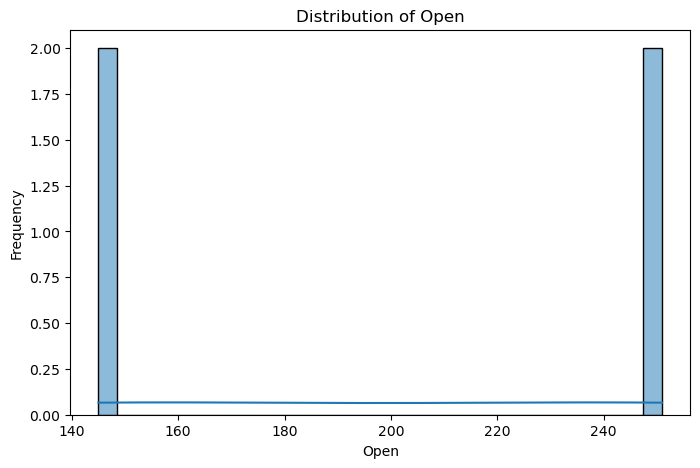

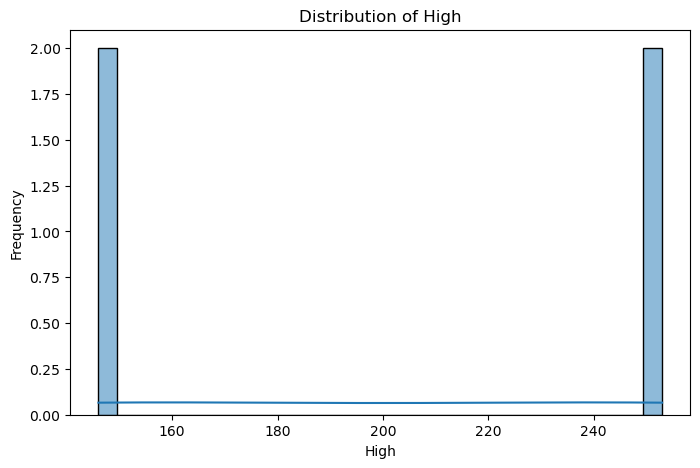

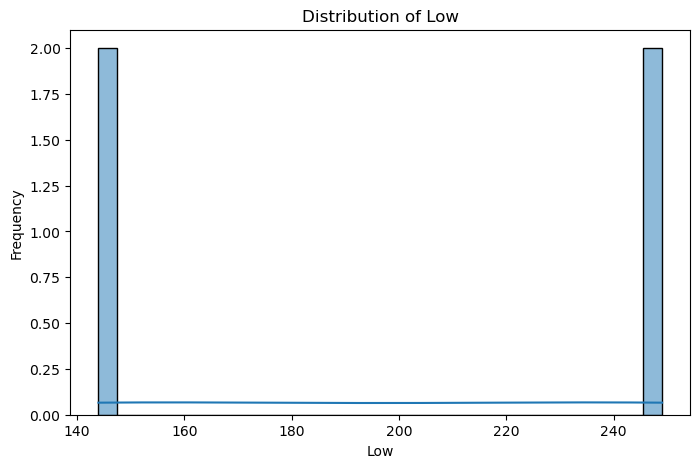

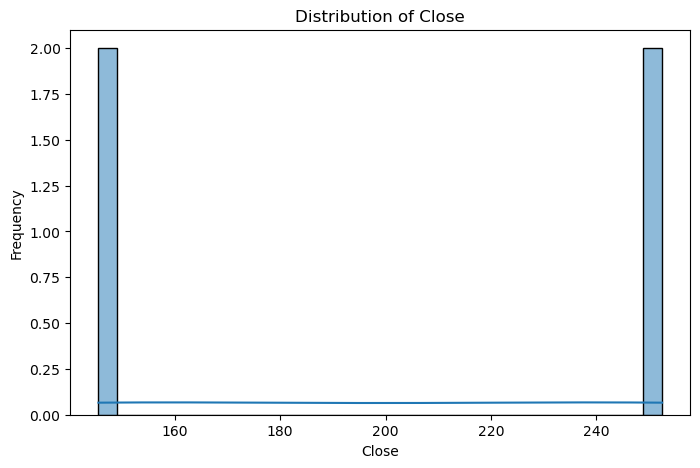

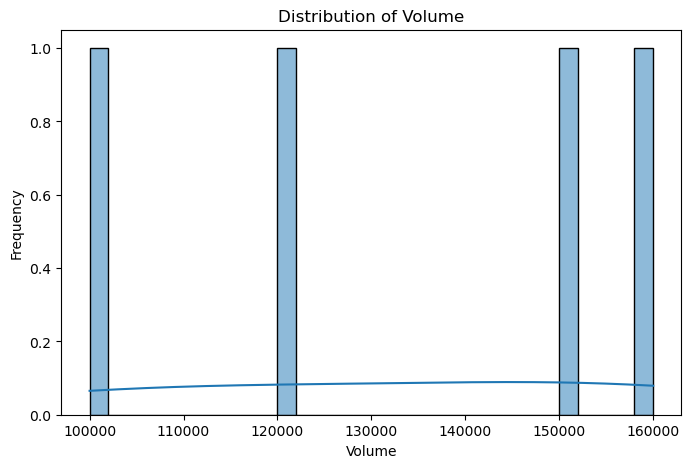

In [18]:

numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [35]:

# Sample dataset (replace this with actual CSV file or data source)
data = {
    "Date": ["2023-02-01", "2023-02-01", "2023-02-02", "2023-02-02"],
    "Ticker": ["AAPL", "MSFT", "AAPL", "MSFT"],
    "Open": [145.0, 250.0, 146.0, 251.0],
    "High": [146.0, 252.0, 147.0, 253.0],
    "Low": [144.0, 248.0, 145.0, 249.0],
    "Close": [145.5, 251.5, 146.5, 252.5],
    "Volume_AAPL": [100000, None, 120000, None],
    "Volume_MSFT": [None, 150000, None, 160000]
}


# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=["Date"], 
                    value_vars=["Volume_AAPL", "Volume_MSFT"], 
                    var_name="Stock", 
                    value_name="Volume")

# Drop rows with NaN volumes
df_melted = df_melted.dropna(subset=["Volume"])

# Plot the comparison using histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x="Date", hue="Stock", weights="Volume", 
             multiple="dodge", bins=len(df_melted["Date"].unique()), 
             shrink=0.8)

# Customize the plot
plt.title("Comparison of Volumes", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


KeyError: "The following 'value_vars' are not present in the DataFrame: ['Volume_AAPL', 'Volume_MSFT']"

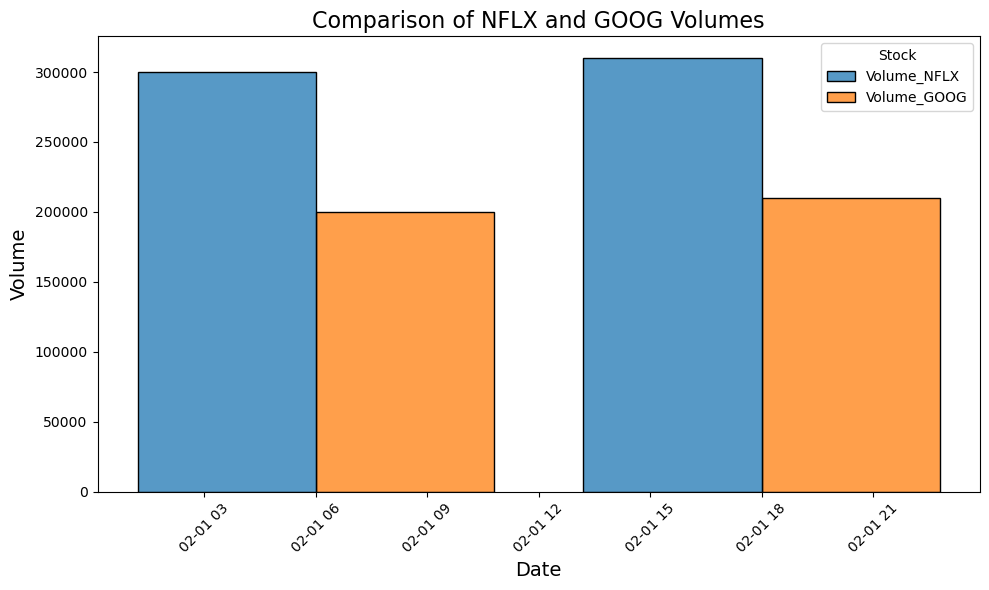

In [31]:


# Sample dataset (replace this with actual CSV file or data source)
data = {
    "Date": ["2023-02-01", "2023-02-01", "2023-02-02", "2023-02-02"],
    "Ticker": ["NFLX", "GOOG", "NFLX", "GOOG"],
    "Open": [345.0, 2750.0, 350.0, 2760.0],
    "High": [350.0, 2765.0, 355.0, 2775.0],
    "Low": [340.0, 2740.0, 345.0, 2750.0],
    "Close": [348.0, 2755.0, 352.0, 2765.0],
    "Volume_NFLX": [300000, None, 310000, None],
    "Volume_GOOG": [None, 200000, None, 210000]
}

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=["Date"], 
                    value_vars=["Volume_NFLX", "Volume_GOOG"], 
                    var_name="Stock", 
                    value_name="Volume")

# Drop rows with NaN volumes
df_melted = df_melted.dropna(subset=["Volume"])

# Plot the comparison using histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x="Date", hue="Stock", weights="Volume", 
             multiple="dodge", bins=len(df_melted["Date"].unique()), 
             shrink=0.8)

# Customize the plot
plt.title("Comparison of NFLX and GOOG Volumes", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
